In [10]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

In [49]:
stock_tweets = pd.read_csv("stock_tweets.csv")
prices_stock = pd.read_csv("stock_yfinance_data.csv")

In [50]:
prices_stock

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV


In [47]:
stock_tweets["Date"] = pd.to_datetime(stock_tweets["Date"])
stock_tweets["Date"] = pd.to_datetime(stock_tweets["Date"], dayfirst=True)

stock_tweets

,Date,Tweet,Stock Name,Company Name
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-07-10,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-04-10,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-01-10,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-01-10,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [51]:
prices_stock["Date"] = pd.to_datetime(prices_stock["Date"])
prices_stock

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV


In [54]:

# Assuming your data is stored in a DataFrame named 'prices_stock'
prices_stock['Avg. Stock price'] = (prices_stock['High'] + prices_stock['Low']) / 2

# Drop all columns except 'Date', 'Stock Name', and 'Avg. Stock price'
prices_stock = prices_stock[['Date', 'Stock Name', 'Avg. Stock price']]

prices_stock

,Date,Stock Name,Avg. Stock price
0,2021-09-30,TSLA,260.688339
1,2021-10-01,TSLA,257.395004
2,2021-10-04,TSLA,263.848328
3,2021-10-05,TSLA,261.918335
4,2021-10-06,TSLA,259.979996
...,...,...,...
6295,2022-09-23,XPEV,13.376000
6296,2022-09-26,XPEV,14.450000
6297,2022-09-27,XPEV,14.190000
6298,2022-09-28,XPEV,13.055500


In [8]:
sentiment_analysis = stock_tweets.copy()
sentiment_analysis["sentiment_score"] = ''
sentiment_analysis["Negative"] = ''
sentiment_analysis["Neutral"] = ''
sentiment_analysis["Positive"] = ''
sentiment_analysis

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,29-09-2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",,,,
1,29-09-2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",,,,
2,29-09-2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",,,,
3,29-09-2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",,,,
4,29-09-2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",,,,
...,...,...,...,...,...,...,...,...
80788,07-10-2021,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,,,,
80789,04-10-2021,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,,,,
80790,01-10-2021,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,,,,
80791,01-10-2021,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,,,,


In [13]:
%%time
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sentiment_analysis.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', sentiment_analysis.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sentiment_analysis.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sentiment_analysis.at[indx, 'Negative'] = sentence_sentiment['neg']
        sentiment_analysis.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sentiment_analysis.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sentiment_analysis.loc[indexx, 'Tweet'])
        print (indx)
        break

<timed exec>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


CPU times: total: 19.4 s
Wall time: 37.6 s


In [78]:
sentiment_final = sentiment_analysis.groupby(["Date", "Stock Name"]).agg({
    "sentiment_score": "sum"
}).reset_index()

# Format the date column
sentiment_final["Date"] = pd.to_datetime(sentiment_final["Date"]).dt.strftime("%d-%m-%Y")

# Convert 'Date' column to datetime type
sentiment_final['Date'] = pd.to_datetime(sentiment_final['Date'])

# Specify column types
sentiment_final = sentiment_final.astype({
    'Date': 'datetime64[ns]',
    'Stock Name': 'object',
    'sentiment_score': 'float'
})

sentiment_final.sort_values(by="Date")

C:\Users\ayazl\AppData\Local\Temp\ipykernel_3040\2046685587.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sentiment_final["Date"] = pd.to_datetime(sentiment_final["Date"]).dt.strftime("%d-%m-%Y")
C:\Users\ayazl\AppData\Local\Temp\ipykernel_3040\2046685587.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sentiment_final['Date'] = pd.to_datetime(sentiment_final['Date'])


,Date,Stock Name,sentiment_score
5741,2021-09-30,TSM,16.1165
5738,2021-09-30,NIO,2.9199
5737,2021-09-30,NFLX,1.2274
5736,2021-09-30,MSFT,1.2324
5742,2021-09-30,XPEV,0.7783
...,...,...,...
5561,2022-09-29,PG,1.1765
5562,2022-09-29,PYPL,0.6300
5563,2022-09-29,TSLA,6.9472
5550,2022-09-29,AMD,1.7443


In [80]:
aapl_prices = prices_stock[prices_stock['Stock Name'] == 'AAPL']

In [56]:
aapl_prices

,Date,Stock Name,Avg. Stock price
1764,2021-09-30,AAPL,142.830002
1765,2021-10-01,AAPL,141.014999
1766,2021-10-04,AAPL,140.240005
1767,2021-10-05,AAPL,140.800003
1768,2021-10-06,AAPL,140.259995
...,...,...,...
2011,2022-09-23,AAPL,150.014999
2012,2022-09-26,AAPL,151.705002
2013,2022-09-27,AAPL,152.334999
2014,2022-09-28,AAPL,147.739998


In [81]:
AAPL = sentiment_final[sentiment_final['Stock Name'] == 'AAPL']
AAPL.sort_values(by ='Date')

,Date,Stock Name,sentiment_score
5730,2021-09-30,AAPL,0.6923
159,2021-10-01,AAPL,3.2108
360,2021-10-02,AAPL,0.0301
545,2021-10-03,AAPL,0.8344
735,2021-10-04,AAPL,0.4741
...,...,...,...
4805,2022-09-25,AAPL,1.9883
4996,2022-09-26,AAPL,4.9266
5193,2022-09-27,AAPL,2.8178
5377,2022-09-28,AAPL,-3.2628


In [82]:
aapl_p = AAPL.merge(aapl_prices, on=["Date", "Stock Name"], how="inner")
aapl_p.sort_values(by='Date')

,Date,Stock Name,sentiment_score,Avg. Stock price
244,2021-09-30,AAPL,0.6923,142.830002
7,2021-10-01,AAPL,3.2108,141.014999
32,2021-10-04,AAPL,0.4741,140.240005
39,2021-10-05,AAPL,0.6953,140.800003
47,2021-10-06,AAPL,1.9033,140.259995
...,...,...,...,...
189,2022-09-23,AAPL,0.2268,150.014999
212,2022-09-26,AAPL,4.9266,151.705002
220,2022-09-27,AAPL,2.8178,152.334999
229,2022-09-28,AAPL,-3.2628,147.739998


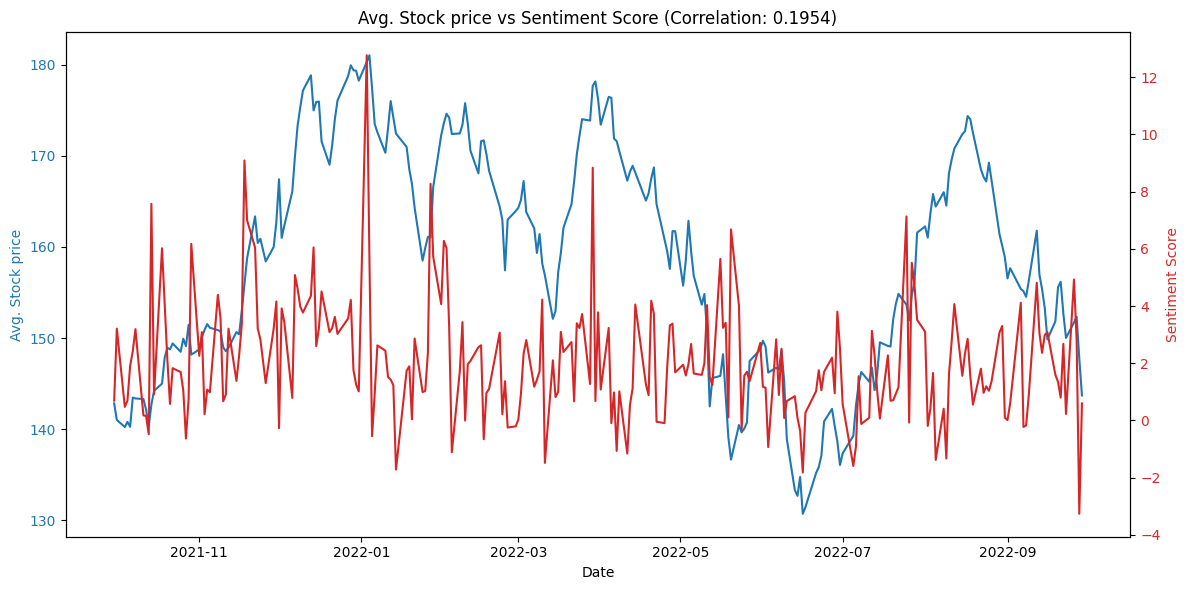

In [257]:
import matplotlib.pyplot as plt

# First, let's sort the DataFrame by date to ensure the data is in chronological order
aapl_p = aapl_p.sort_values(by="Date")

# Setting up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Avg. Stock price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg. Stock price', color='tab:blue')
ax1.plot(aapl_p['Date'], aapl_p['Avg. Stock price'], color='tab:blue', label='Avg. Stock price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Using twinx() to create a second y-axis for the sentiment score
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='tab:red')
ax2.plot(aapl_p['Date'], aapl_p['sentiment_score'], color='tab:red', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Calculating and displaying the correlation coefficient on the plot
correlation = aapl_p['Avg. Stock price'].corr(aapl_p['sentiment_score'])
plt.title(f'Avg. Stock price vs Sentiment Score (Correlation: {correlation:.4f})')

# Display the plot
plt.tight_layout()
plt.show()


In [63]:
tsla_prices = prices_stock[prices_stock['Stock Name'] == 'TSLA']
tsla_prices

,Date,Stock Name,Avg. Stock price
0,2021-09-30,TSLA,260.688339
1,2021-10-01,TSLA,257.395004
2,2021-10-04,TSLA,263.848328
3,2021-10-05,TSLA,261.918335
4,2021-10-06,TSLA,259.979996
...,...,...,...
247,2022-09-23,TSLA,278.660004
248,2022-09-26,TSLA,277.199997
249,2022-09-27,TSLA,283.090012
250,2022-09-28,TSLA,283.285004


In [84]:
TSLA = sentiment_final[sentiment_final['Stock Name'] == 'TSLA']
tsla_p = TSLA.merge(tsla_prices, on=["Date", "Stock Name"], how="inner")
tsla_p.sort_values(by='Date')


,Date,Stock Name,sentiment_score,Avg. Stock price
244,2021-09-30,TSLA,20.8397,260.688339
7,2021-10-01,TSLA,21.9682,257.395004
32,2021-10-04,TSLA,16.1112,263.848328
39,2021-10-05,TSLA,6.1112,261.918335
47,2021-10-06,TSLA,15.5953,259.979996
...,...,...,...,...
189,2022-09-23,TSLA,12.3497,278.660004
212,2022-09-26,TSLA,10.4783,277.199997
220,2022-09-27,TSLA,15.9960,283.090012
229,2022-09-28,TSLA,9.5537,283.285004


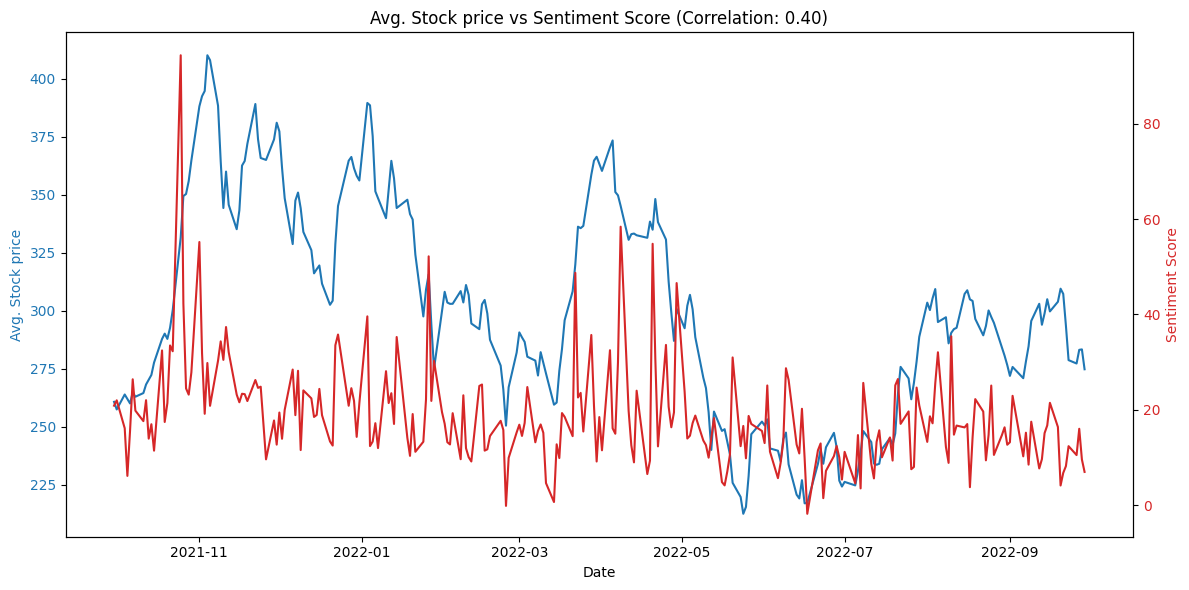

In [85]:

# First, let's sort the DataFrame by date to ensure the data is in chronological order
tsla_p = tsla_p.sort_values(by="Date")

# Setting up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Avg. Stock price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg. Stock price', color='tab:blue')
ax1.plot(tsla_p['Date'], tsla_p['Avg. Stock price'], color='tab:blue', label='Avg. Stock price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Using twinx() to create a second y-axis for the sentiment score
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='tab:red')
ax2.plot(tsla_p['Date'], tsla_p['sentiment_score'], color='tab:red', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Calculating and displaying the correlation coefficient on the plot
correlation = tsla_p['Avg. Stock price'].corr(tsla_p['sentiment_score'])
plt.title(f'Avg. Stock price vs Sentiment Score (Correlation: {correlation:.2f})')

# Display the plot
plt.tight_layout()
plt.show()


In [65]:
tsm_prices = prices_stock[prices_stock['Stock Name'] == 'TSM']
tsm_prices

,Date,Stock Name,Avg. Stock price
2268,2021-09-30,TSM,112.500000
2269,2021-10-01,TSM,111.300003
2270,2021-10-04,TSM,109.974998
2271,2021-10-05,TSM,109.785000
2272,2021-10-06,TSM,108.549999
...,...,...,...
2515,2022-09-23,TSM,73.739998
2516,2022-09-26,TSM,73.555000
2517,2022-09-27,TSM,73.195000
2518,2022-09-28,TSM,71.494999


In [86]:
TSM = sentiment_final[sentiment_final['Stock Name'] == 'TSM']
tsm_p = TSM.merge(tsm_prices, on = ['Date', 'Stock Name'], how= 'inner')
tsm_p

,Date,Stock Name,sentiment_score,Avg. Stock price
0,2022-02-01,TSM,2.7900,121.669998
1,2022-03-01,TSM,6.4197,109.080002
2,2022-04-01,TSM,6.0437,104.079998
3,2022-06-01,TSM,2.8709,95.095001
4,2022-07-01,TSM,2.2958,77.700001
...,...,...,...,...
247,2022-01-31,TSM,15.2807,120.789997
248,2022-03-31,TSM,8.8695,105.670002
249,2022-05-31,TSM,5.7591,95.400002
250,2022-08-31,TSM,3.3784,83.965000


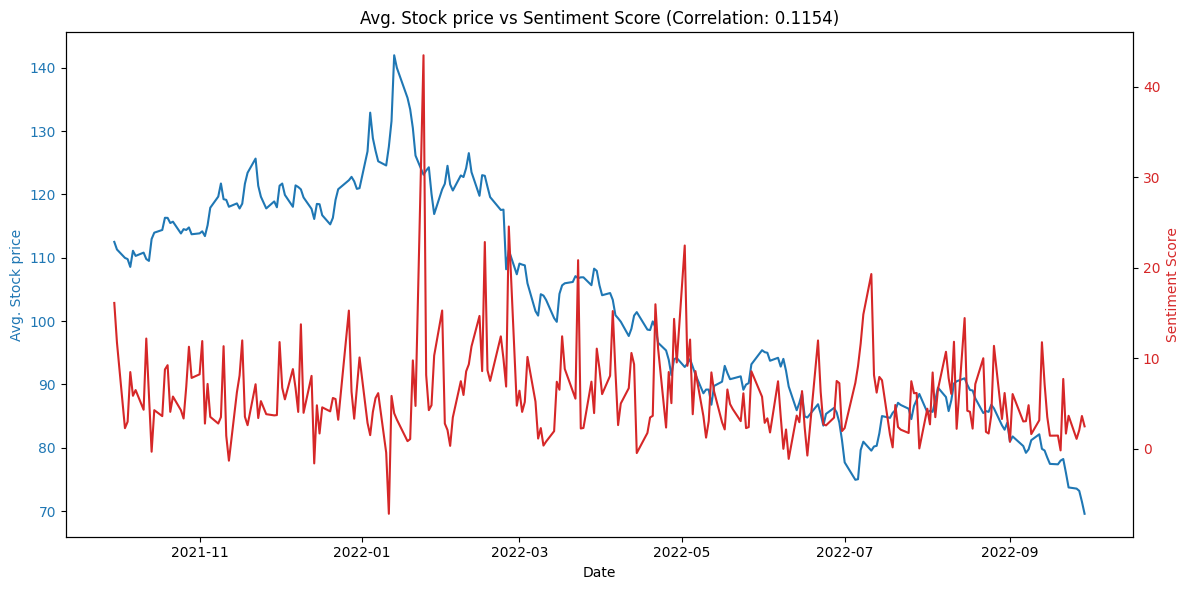

In [260]:

# First, let's sort the DataFrame by date to ensure the data is in chronological order
tsm_p = tsm_p.sort_values(by="Date")

# Setting up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Avg. Stock price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg. Stock price', color='tab:blue')
ax1.plot(tsm_p['Date'], tsm_p['Avg. Stock price'], color='tab:blue', label='Avg. Stock price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Using twinx() to create a second y-axis for the sentiment score
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='tab:red')
ax2.plot(tsm_p['Date'], tsm_p['sentiment_score'], color='tab:red', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Calculating and displaying the correlation coefficient on the plot
correlation = tsm_p['Avg. Stock price'].corr(tsm_p['sentiment_score'])
plt.title(f'Avg. Stock price vs Sentiment Score (Correlation: {correlation:.4f})')

# Display the plot
plt.tight_layout()
plt.show()


In [100]:
########################################
################################################
##################################################################
from sklearn.model_selection import RandomizedSearchCV

X = tsla_p[['sentiment_score']]
y = tsla_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the hyperparameters and their distributions
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Initialize the regressor
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 110, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 2, 'bootstrap': False}


In [199]:
######################################################
############################################################
#################################################################
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#machine learning - TSLA - rf regression
X = tsla_p[['sentiment_score']]
y = tsla_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 110,
min_samples_split = 15,
min_samples_leaf = 9,
max_features = 'sqrt',
max_depth = 2,
bootstrap = True
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Absolute Error: 34.30329712241794
Mean Squared Error: 1839.809817810518
R-squared: 0.14840354668966105


Correlation between Actual and Predicted Stock Prices: 0.3937


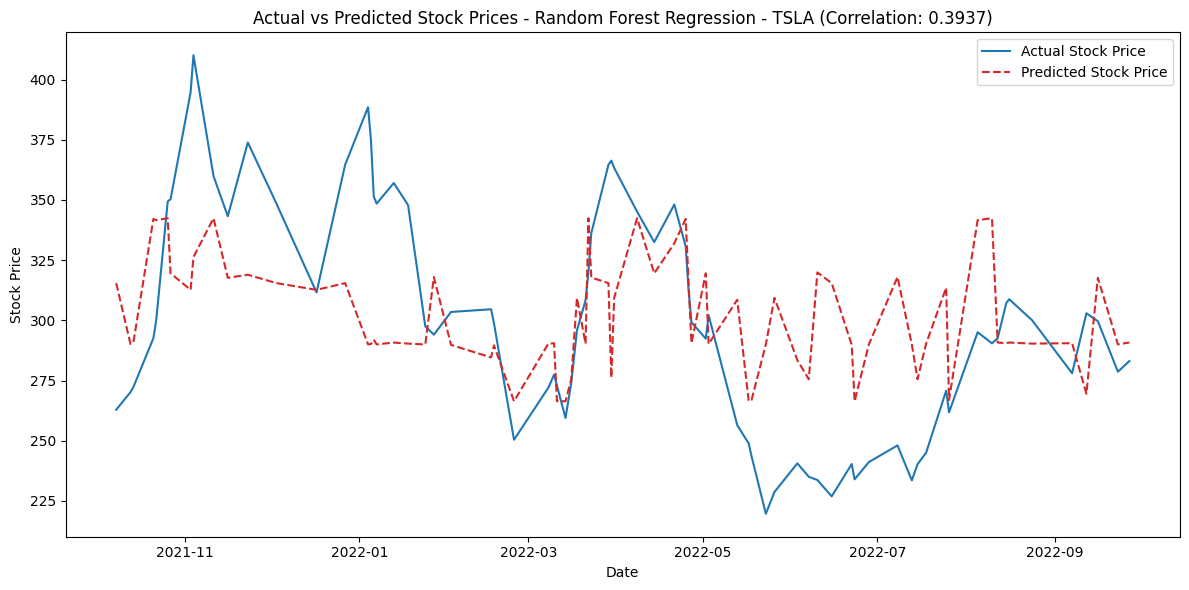

In [234]:
tsla_p = tsla_p.sort_values(by="Date")

#machine learning - TSLA - rf regression
X = tsla_p[['sentiment_score']]
y = tsla_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 110,
min_samples_split = 15,
min_samples_leaf = 9,
max_features = 'sqrt',
max_depth = 2,
bootstrap = True
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


plot_df = pd.DataFrame({
    'Date': tsla_p.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.4f}")

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Random Forest Regression - TSLA (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()





In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##############################################
####################################################
#######################################################


# - regression - tsla

X = tsla_p[['sentiment_score']]  
y = tsla_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 34.791494380564345
Mean Squared Error: 1835.3003246310489
R-squared: 0.1504908648247676


Correlation between Actual and Predicted Stock Prices: 0.3885


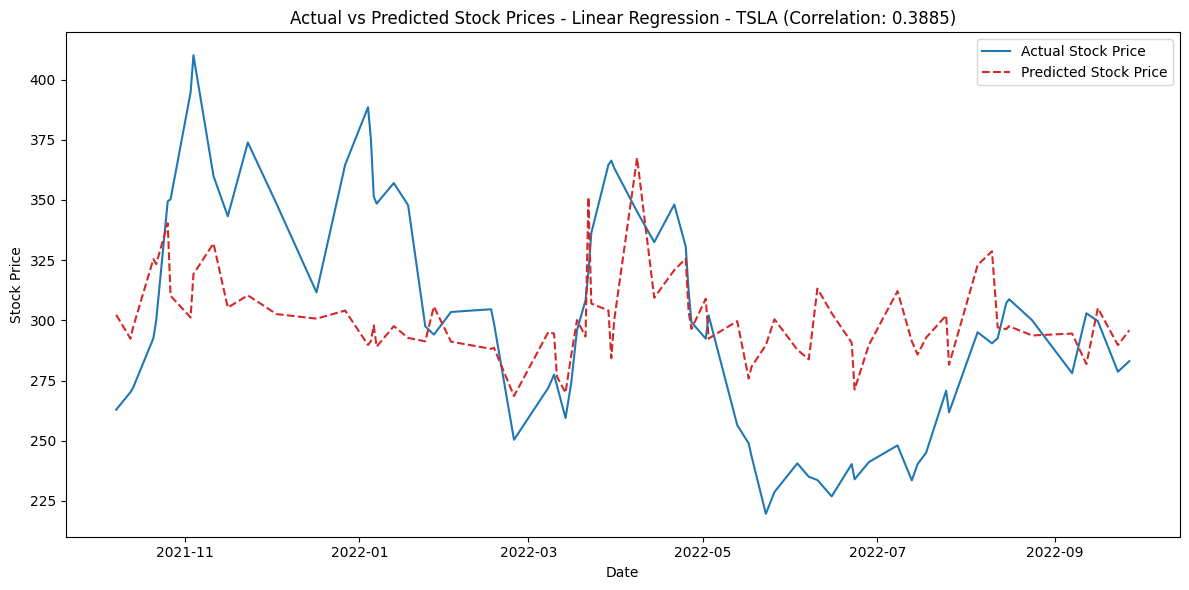

In [236]:
tsla_p = tsla_p.sort_values(by="Date")


X = tsla_p[['sentiment_score']]  
y = tsla_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


plot_df = pd.DataFrame({
    'Date': tsla_p.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.4f}")

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Linear Regression - TSLA (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [148]:
###########################################
##########################################################
###############################################################



X = aapl_p[['sentiment_score']]
y = aapl_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the hyperparameters and their distributions
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Initialize the regressor
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 110, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 2, 'bootstrap': False}


In [135]:


#machine learning - AAPL - rf regression
X = aapl_p[['sentiment_score']]
y = aapl_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 110,
min_samples_split = 15,
min_samples_leaf = 9,
max_features = 'sqrt',
max_depth = 2,
bootstrap = False
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.792289859474565
Mean Squared Error: 143.300912308511
R-squared: 0.028034476292257193


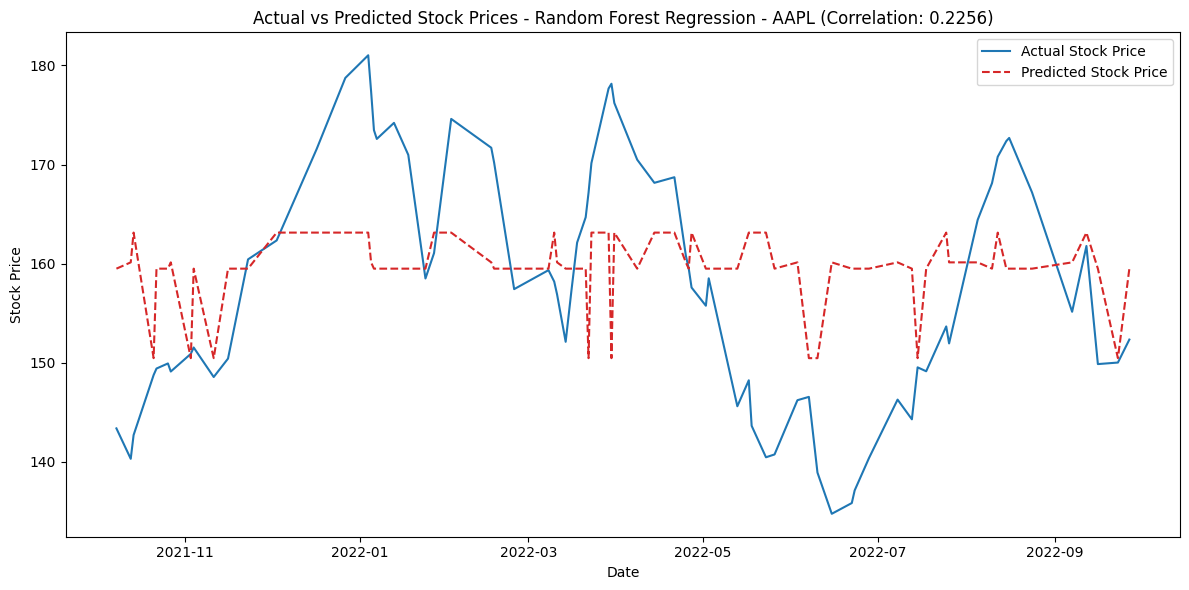

Correlation between Actual and Predicted Stock Prices: 0.23


In [238]:
aapl_p = aapl_p.sort_values(by="Date")



#machine learning - AAPL - rf regression
X = aapl_p[['sentiment_score']]
y = aapl_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 110,
min_samples_split = 15,
min_samples_leaf = 9,
max_features = 'sqrt',
max_depth = 2,
bootstrap = False
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




plot_df = pd.DataFrame({
    'Date': aapl_p.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Random Forest Regression - AAPL (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.2f}")



In [145]:
X = aapl_p[['sentiment_score']]  
y = aapl_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.095155952826243
Mean Squared Error: 140.35897081353562
R-squared: 0.047988750552041104


Correlation between Actual and Predicted Stock Prices: 0.24


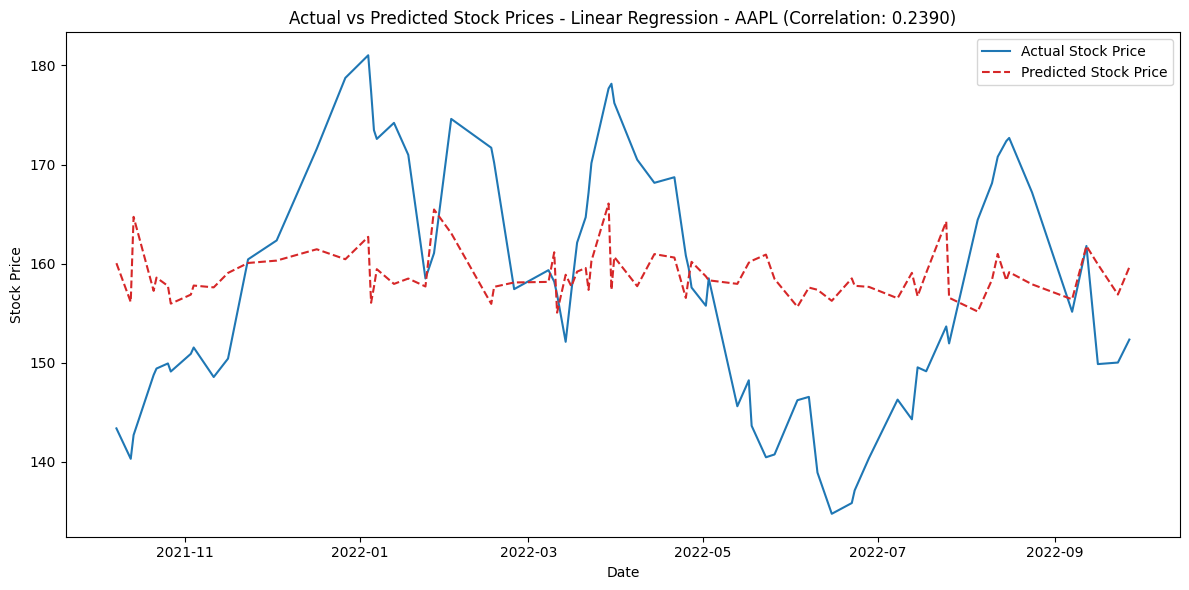

In [240]:
aapl_p = aapl_p.sort_values(by="Date")



X = aapl_p[['sentiment_score']]  
y = aapl_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


plot_df = pd.DataFrame({
    'Date': aapl_p.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.2f}")

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Linear Regression - AAPL (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()




In [146]:
###########################################
##########################################################
###############################################################
# TSM


X = tsm_p[['sentiment_score']]
y = tsm_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the hyperparameters and their distributions
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Initialize the regressor
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 1, 'bootstrap': False}


In [169]:
#machine learning - TSM - rf regression
X = tsm_p[['sentiment_score']]
y = tsm_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 90,
min_samples_split = 2,
min_samples_leaf = 10,
max_features = 'log2',
max_depth = 10000,
bootstrap = True
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 12.632977323002713
Mean Squared Error: 240.43001813209818
R-squared: 0.06410319956910981


Correlation between Actual and Predicted Stock Prices: 0.27


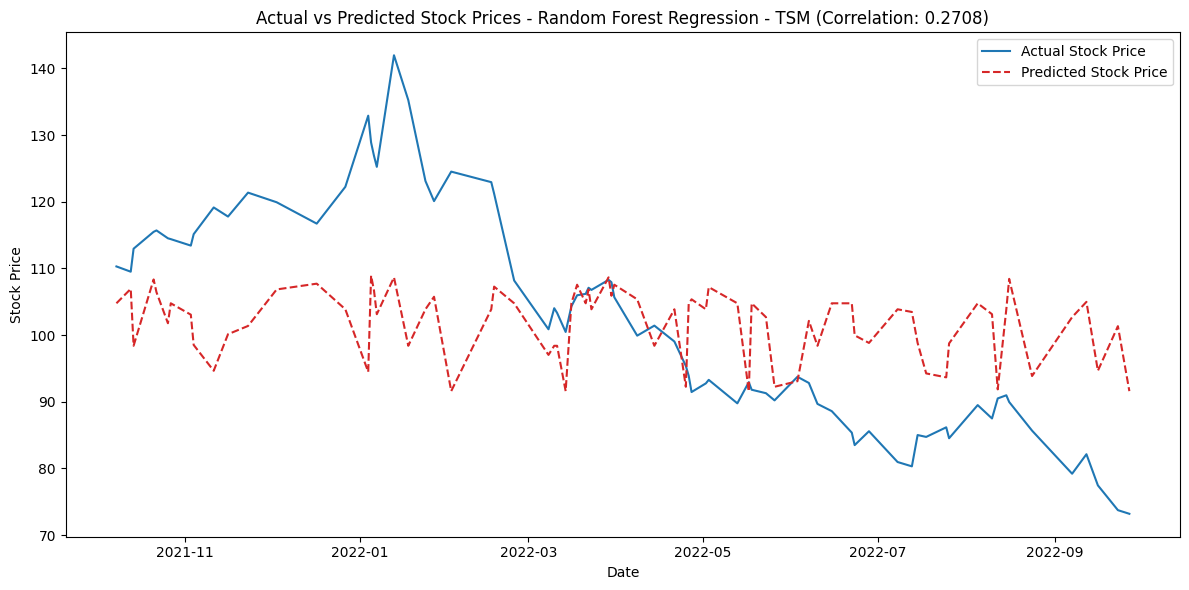

In [248]:
tsm_p = tsm_p.sort_values(by="Date")



X = tsm_p[['sentiment_score']]
y = tsm_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 90,
min_samples_split = 2,
min_samples_leaf = 10,
max_features = 'log2',
max_depth = 10000,
bootstrap = True
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)





plot_df = pd.DataFrame({
    'Date': tsm_p.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.2f}")

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Random Forest Regression - TSM (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()



In [190]:
X = tsm_p[['sentiment_score']]  
y = tsm_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Absolute Error: 13.522771136917134
Mean Squared Error: 252.30399092008633
R-squared: 0.01788262683440278


Correlation between Actual and Predicted Stock Prices: 0.14


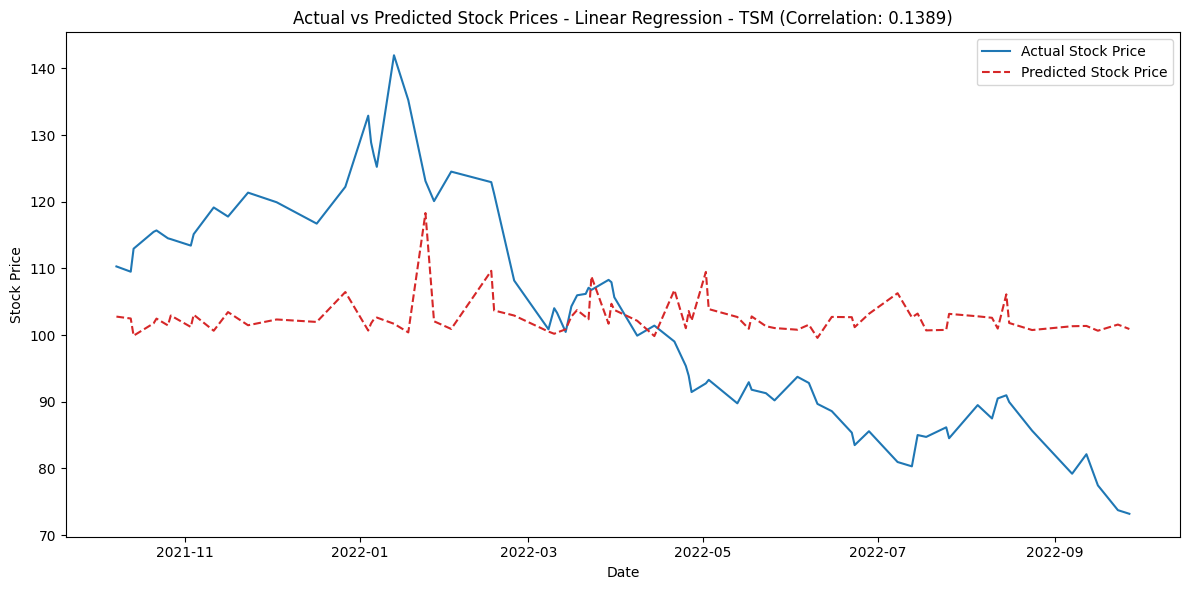

In [250]:
tsm_p = tsm_p.sort_values(by="Date")

X = tsm_p[['sentiment_score']]  
y = tsm_p['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




plot_df = pd.DataFrame({
    'Date': tsm_p.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.2f}")
# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Linear Regression - TSM (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()




In [251]:
# Shift the date in sentiment_final by one day forward
sentiment_final_shifted = sentiment_final.copy()
sentiment_final_shifted['Date'] = sentiment_final_shifted['Date'] + pd.Timedelta(days=1)

# Merge the shifted sentiment_final with prices_stock
merged_data_notnormaltime = pd.merge(sentiment_final_shifted, prices_stock, on=['Date', 'Stock Name'], how='left')

# Rename the stock columns to indicate they are the next day's values
rename_columns = {
    'Open': 'Next_Day_Open',
    'Close': 'Next_Day_Close',
    'High': 'Next_Day_High',
    'Low': 'Next_Day_Low',
    'Adj Close': 'Next_Day_Adj_Close',
    'Volume': 'Next_Day_Volume'
}
merged_data_notnormaltime = merged_data_notnormaltime.rename(columns=rename_columns)


merged_data_notnormaltime=merged_data_notnormaltime.dropna()
merged_data_notnormaltime

,Date,Stock Name,sentiment_score,Avg. Stock price
18,2022-02-02,AAPL,6.2774,174.605003
19,2022-02-02,AMD,3.8499,125.349998
20,2022-02-02,AMZN,7.4378,151.969246
21,2022-02-02,DIS,0.3400,142.985001
22,2022-02-02,GOOG,8.4728,148.828751
...,...,...,...,...
5890,2021-11-01,PG,3.8137,143.145004
5891,2021-11-01,PYPL,0.8749,231.870003
5892,2021-11-01,TSLA,30.2135,388.068329
5893,2021-11-01,TSM,5.0029,113.844997


In [252]:
merged_data_notnormaltime['Date'] = pd.to_datetime(merged_data_notnormaltime['Date'])

# Sort by 'Date'
merged_data_notnormaltime = merged_data_notnormaltime.sort_values(by='Date', ascending=True)
merged_data_notnormaltime

,Date,Stock Name,sentiment_score,Avg. Stock price
5738,2021-10-01,NIO,2.9199,35.964998
5740,2021-10-01,TSLA,20.8397,257.395004
5739,2021-10-01,PG,1.2324,139.275002
5737,2021-10-01,NFLX,1.2274,606.250000
5736,2021-10-01,MSFT,1.2324,285.635010
...,...,...,...,...
5393,2022-09-29,TSM,3.6274,69.580002
5394,2022-09-29,VZ,-0.4278,38.825001
5395,2022-09-29,ZS,0.3818,165.239998
5387,2022-09-29,MSFT,3.9452,237.180000


In [253]:
tsla_shifted = merged_data_notnormaltime[merged_data_notnormaltime['Stock Name'] == 'TSLA']
tsla_shifted

,Date,Stock Name,sentiment_score,Avg. Stock price
5740,2021-10-01,TSLA,20.8397,257.395004
555,2021-10-04,TSLA,16.5658,263.848328
747,2021-10-05,TSLA,16.1112,261.918335
939,2021-10-06,TSLA,6.1112,259.979996
1124,2021-10-07,TSLA,15.5953,264.730011
...,...,...,...,...
4225,2022-09-23,TSLA,8.1572,278.660004
4819,2022-09-26,TSLA,3.5669,277.199997
5010,2022-09-27,TSLA,10.4783,283.090012
5202,2022-09-28,TSLA,15.9960,283.285004


In [254]:
correlation = tsla_shifted['sentiment_score'].corr(tsla_shifted['Avg. Stock price'])
print(f"Next day Correlation for TSLA: {correlation:.4f}")

Correlation: 0.4578


In [255]:
aapl_shifted = merged_data_notnormaltime[merged_data_notnormaltime['Stock Name'] == 'AAPL']
aapl_shifted

,Date,Stock Name,sentiment_score,Avg. Stock price
5730,2021-10-01,AAPL,0.6923,141.014999
545,2021-10-04,AAPL,0.8344,140.240005
735,2021-10-05,AAPL,0.4741,140.800003
926,2021-10-06,AAPL,0.6953,140.259995
1111,2021-10-07,AAPL,1.9033,143.470001
...,...,...,...,...
4209,2022-09-23,AAPL,2.6786,150.014999
4805,2022-09-26,AAPL,1.9883,151.705002
4996,2022-09-27,AAPL,4.9266,152.334999
5193,2022-09-28,AAPL,2.8178,147.739998


In [256]:
correlation = aapl_shifted['sentiment_score'].corr(aapl_shifted['Avg. Stock price'])
print(f"Next day Correlation for AAPL: {correlation:.4f}")

Next day Correlation for AAPL: 0.2058


In [258]:
tsm_shifted = merged_data_notnormaltime[merged_data_notnormaltime['Stock Name'] == 'TSM']
tsm_shifted

,Date,Stock Name,sentiment_score,Avg. Stock price
5741,2021-10-01,TSM,16.1165,111.300003
556,2021-10-04,TSM,5.6124,109.974998
748,2021-10-05,TSM,2.2823,109.785000
940,2021-10-06,TSM,2.9962,108.549999
1125,2021-10-07,TSM,8.4807,111.099998
...,...,...,...,...
4226,2022-09-23,TSM,1.6860,73.739998
4820,2022-09-26,TSM,3.0723,73.555000
5011,2022-09-27,TSM,1.0998,73.195000
5203,2022-09-28,TSM,2.0596,71.494999


In [259]:
correlation = tsm_shifted['sentiment_score'].corr(tsm_shifted['Avg. Stock price'])
print(f"Next day Correlation for TSM: {correlation:.4f}")

Next day Correlation for TSM: 0.0760


In [262]:
########################################
################################################
##################################################################
from sklearn.model_selection import RandomizedSearchCV

X = tsla_shifted[['sentiment_score']]
y = tsla_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the hyperparameters and their distributions
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Initialize the regressor
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 120, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 2, 'bootstrap': False}


In [276]:
#########################################
#######################################################
################################################################


# next days stock price - machine learning - TSLA

######################################################
############################################################
#################################################################


#machine learning - TSLA - rf regression
X = tsla_shifted[['sentiment_score']]
y = tsla_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 120,
min_samples_split = 2,
min_samples_leaf = 4,
max_features = 'log2',
max_depth = 2,
bootstrap = False
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")




Mean Absolute Error: 29.38241197058046
Mean Squared Error: 1355.1591419542656
R-squared: 0.31559091427641317


Correlation between Actual and Predicted Stock Prices: 0.5758


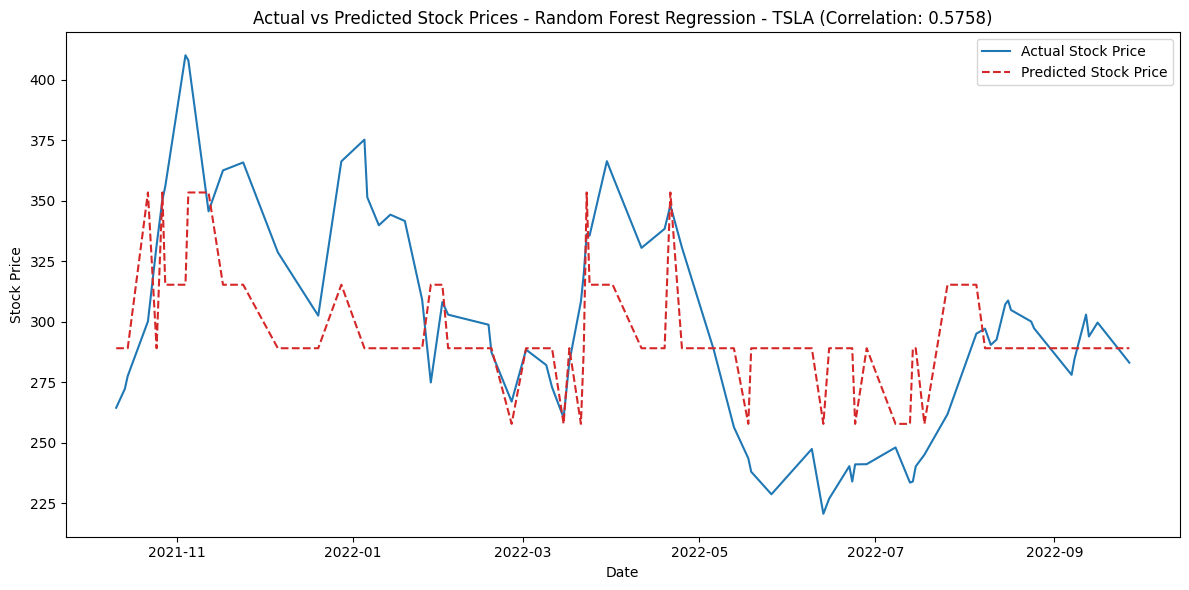

In [277]:
tsla_shifted = tsla_shifted.sort_values(by="Date")

#machine learning - TSLA - rf regression
#machine learning - TSLA - rf regression
X = tsla_shifted[['sentiment_score']]
y = tsla_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 120,
min_samples_split = 2,
min_samples_leaf = 4,
max_features = 'log2',
max_depth = 2,
bootstrap = False
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



plot_df = pd.DataFrame({
    'Date': tsla_shifted.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.4f}")

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Random Forest Regression - TSLA (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()





In [279]:

##############################################
####################################################
#######################################################


# - regression - tsla

X = tsla_shifted[['sentiment_score']]  
y = tsla_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 31.05709455597623
Mean Squared Error: 1491.927173474808
R-squared: 0.24651763682045214


Mean Absolute Error: 31.05709455597623
Mean Squared Error: 1491.927173474808
R-squared: 0.24651763682045214
Correlation between Actual and Predicted Stock Prices: 0.5096


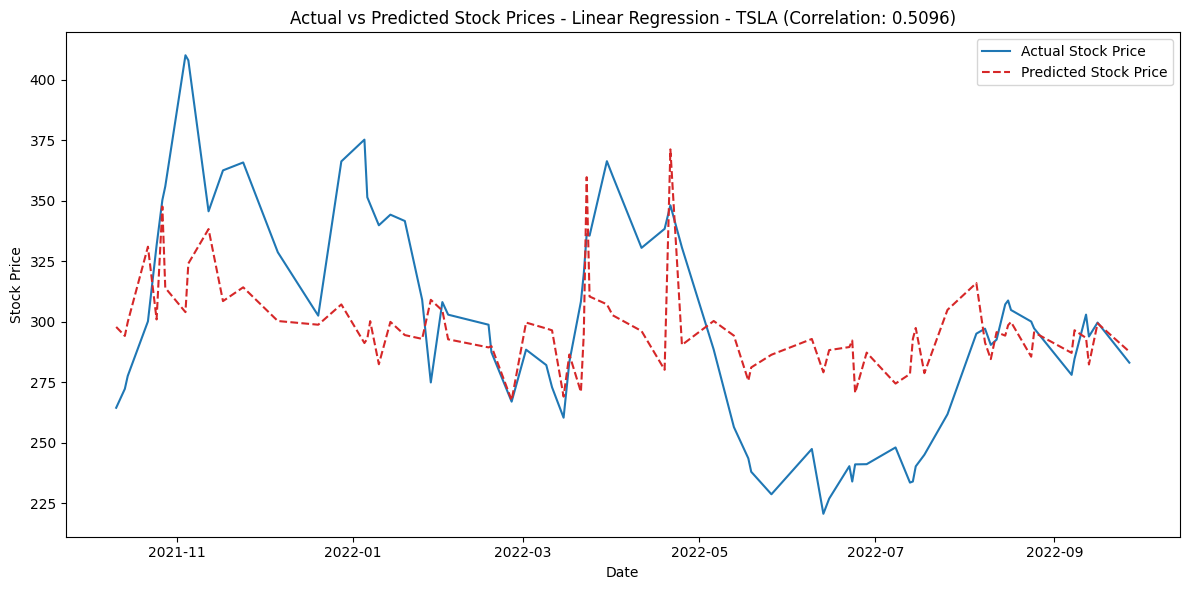

In [280]:
tsla_shifted = tsla_shifted.sort_values(by="Date")

X = tsla_shifted[['sentiment_score']]  
y = tsla_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plot_df = pd.DataFrame({
    'Date': tsla_shifted.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.4f}")

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Linear Regression - TSLA (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [281]:
###########################################
##########################################################
###############################################################

# aapl 

X = aapl_shifted[['sentiment_score']]
y = aapl_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the hyperparameters and their distributions
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Initialize the regressor
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 170, 'min_samples_split': 7, 'min_samples_leaf': 16, 'max_features': 'log2', 'max_depth': 11, 'bootstrap': True}


In [298]:


#machine learning - AAPL - rf regression
X = aapl_shifted[['sentiment_score']]
y = aapl_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 170,
min_samples_split = 7,
min_samples_leaf = 16,
max_features = 'log2',
max_depth = 11,
bootstrap = True
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.727204652517152
Mean Squared Error: 152.09749199032544
R-squared: -0.018432466969312333


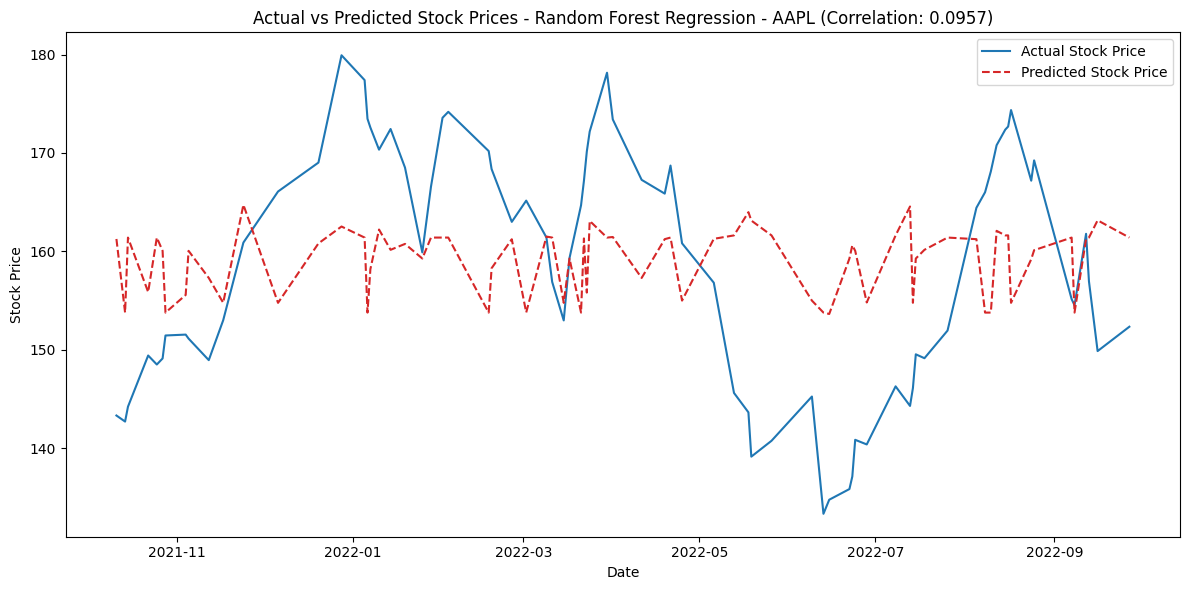

Correlation between Actual and Predicted Stock Prices: 0.10


In [305]:
aapl_shifted = aapl_shifted.sort_values(by="Date")



#machine learning - AAPL - rf regression
X = aapl_shifted[['sentiment_score']]
y = aapl_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 170,
min_samples_split = 7,
min_samples_leaf = 16,
max_features = 'log2',
max_depth = 11,
bootstrap = True
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)





plot_df = pd.DataFrame({
    'Date': aapl_shifted.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Random Forest Regression - AAPL (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.2f}")



In [309]:

##############################################
####################################################
#######################################################


# - regression - aapl

X = aapl_shifted[['sentiment_score']]  
y = aapl_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 10.84379388909214
Mean Squared Error: 148.32442412238169
R-squared: 0.006831689372181038


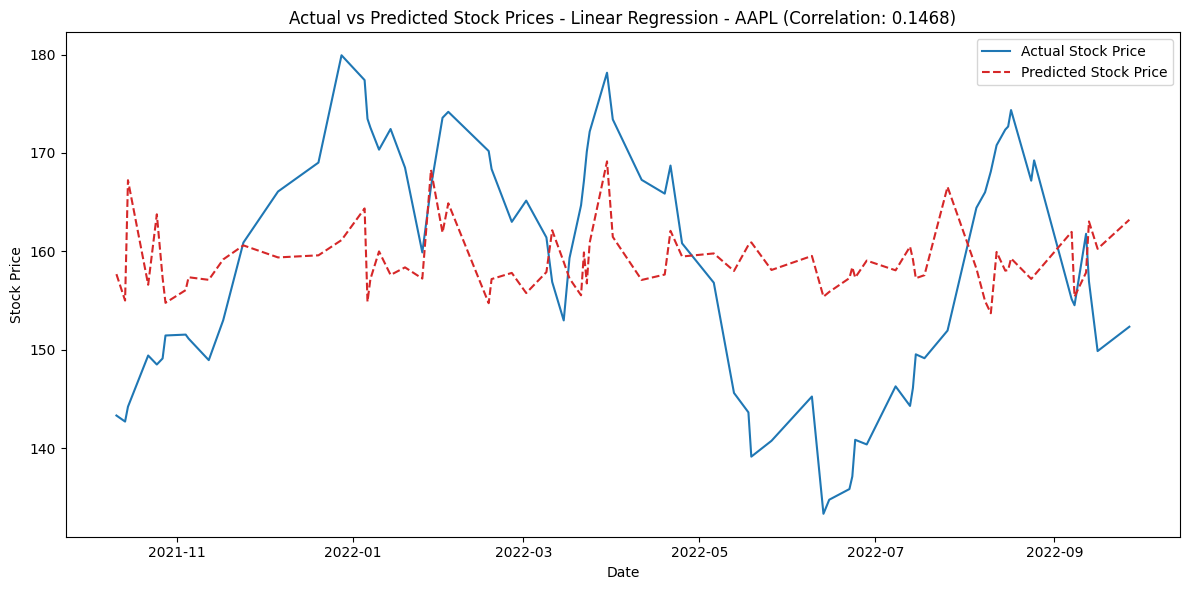

Correlation between Actual and Predicted Stock Prices: 0.15


In [312]:
aapl_shifted = aapl_shifted.sort_values(by="Date")



X = aapl_shifted[['sentiment_score']]  
y = aapl_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)





plot_df = pd.DataFrame({
    'Date': aapl_shifted.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Linear Regression - AAPL (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.2f}")



In [313]:
###########################################
##########################################################
###############################################################

# TSM 

X = tsm_shifted[['sentiment_score']]
y = tsm_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the hyperparameters and their distributions
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Initialize the regressor
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 150, 'min_samples_split': 8, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 1, 'bootstrap': True}


In [331]:


#machine learning - TSM - rf regression
X = tsm_shifted[['sentiment_score']]
y = tsm_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 150,
min_samples_split = 8,
min_samples_leaf = 12,
max_features = 'sqrt',
max_depth = 1,
bootstrap = True
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 14.237142502614478
Mean Squared Error: 266.5256096738312
R-squared: -0.016532211800148078


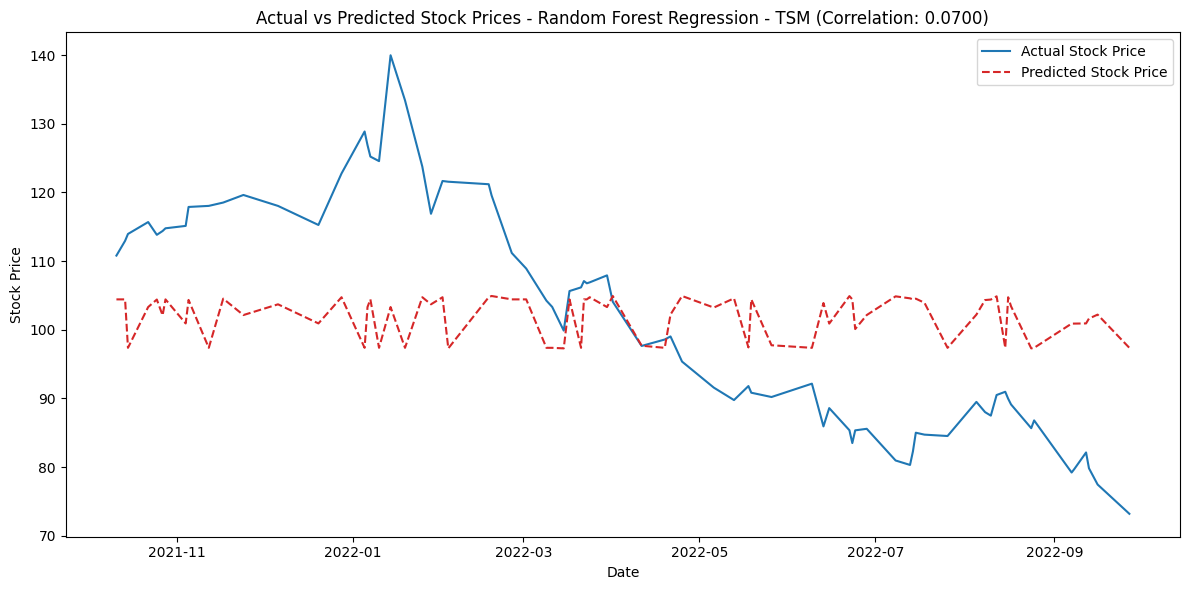

Correlation between Actual and Predicted Stock Prices: 0.06


In [407]:
tsm_shifted = tsm_shifted.sort_values(by="Date")


X = tsm_shifted[['sentiment_score']]
y = tsm_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest regressor instance
clf_rf = RandomForestRegressor(n_estimators = 150,
min_samples_split = 8,
min_samples_leaf = 12,
max_features = 'sqrt',
max_depth = 1,
bootstrap = True
)

# Fit the model to the training data
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)





plot_df = pd.DataFrame({
    'Date': tsm_shifted.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Random Forest Regression - TSM (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.2f}")



In [414]:


# - regression - TSM

X = tsm_shifted[['sentiment_score']]  
y = tsm_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 14.363250885696424
Mean Squared Error: 260.0327663470263
R-squared: 0.008231578801235373


Mean Absolute Error: 14.363250885696424
Mean Squared Error: 260.0327663470263
R-squared: 0.008231578801235373


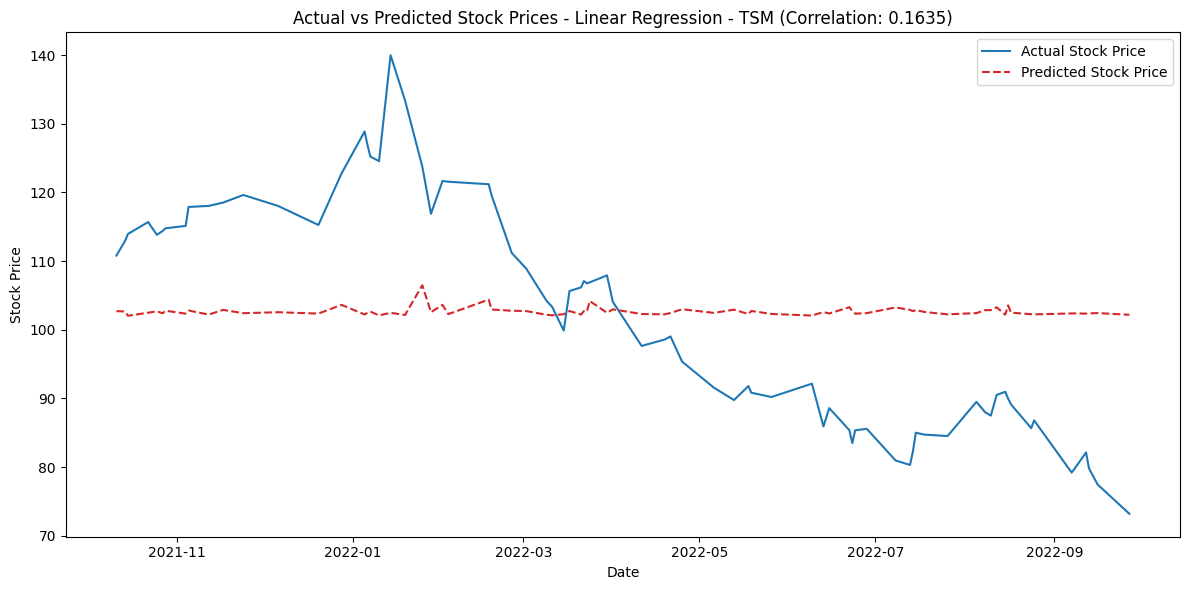

Correlation between Actual and Predicted Stock Prices: 0.16


In [417]:
tsm_shifted = tsm_shifted.sort_values(by="Date")


X = tsm_shifted[['sentiment_score']]  
y = tsm_shifted['Avg. Stock price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model instance
clf_lr = LinearRegression()

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")





plot_df = pd.DataFrame({
    'Date': tsm_shifted.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Sort the DataFrame by date
plot_df = plot_df.sort_values(by="Date")

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual and predicted stock prices against Date
ax.plot(plot_df['Date'], plot_df['Actual'], color='tab:blue', label='Actual Stock Price')
ax.plot(plot_df['Date'], plot_df['Predicted'], color='tab:red', linestyle='--', label='Predicted Stock Price')

# Setting labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Actual vs Predicted Stock Prices - Linear Regression - TSM (Correlation: {correlation:.4f})')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

correlation = plot_df['Actual'].corr(plot_df['Predicted'])
print(f"Correlation between Actual and Predicted Stock Prices: {correlation:.2f}")

